##Handling Missing Data with Pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.isnull(np.nan)

True

In [ ]:
pd.isnull(None)

True

In [ ]:
pd.isna(np.nan)

True

In [ ]:
pd.isna(None)

True

In [ ]:
pd.notnull(None)

False

In [ ]:
pd.notnull(np.nan)

False

In [ ]:
pd.notnull(3)

True

In [ ]:
pd.isnull(pd.Series([1, np.nan, 7]))

,0
0,False
1,True
2,False


In [ ]:
pd.notnull(pd.Series([1, np.nan, 7]))

,0
0,True
1,False
2,True


In [ ]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


##Pandas Operations with Missing Values

In [ ]:
pd.Series([1, 2, np.nan]).count()

np.int64(2)

In [ ]:
pd.Series([1, 2, np.nan]).sum()

np.float64(3.0)

In [ ]:
pd.Series([2, 2, np.nan]).mean()

np.float64(2.0)

##Filtering Missing Data

In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [ ]:
pd.notnull(s)

,0
0,True
1,True
2,True
3,False
4,False
5,True


In [ ]:
s[pd.notnull(s)]

,0
0,1.0
1,2.0
2,3.0
5,4.0


In [ ]:
s.isnull()

,0
0,False
1,False
2,False
3,True
4,True
5,False


In [ ]:
s.notnull()

,0
0,True
1,True
2,True
3,False
4,False
5,True


In [ ]:
s[s.notnull()]

,0
0,1.0
1,2.0
2,3.0
5,4.0


##Dropping Null Values in DataFrames

In [ ]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [ ]:
df

,Column A,Column B,Column C,Column D
0,1.0,2,NaN,5
1,NaN,8,9.0,8
2,30.0,31,32.0,34
3,NaN,<module 'numpy' from '/usr/local/lib/python3.1...,100.0,110


In [ ]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,False,False,False


In [ ]:
df.isnull().sum()

,0
Column A,2
Column B,0
Column C,1
Column D,0


In [ ]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31,32.0,34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  4 non-null      object 
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 260.0+ bytes


In [ ]:
df.shape

(4, 4)

In [ ]:
df.dropna(axis='columns')

,Column B,Column D
0,2,5
1,8,8
2,31,34
3,<module 'numpy' from '/usr/local/lib/python3.1...,110


In [ ]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [ ]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2,NaN,5
1,NaN,8,9.0,8
2,30.0,31,32.0,34
3,NaN,<module 'numpy' from '/usr/local/lib/python3.1...,100.0,110


In [ ]:
df.dropna(how='any') # default

,Column A,Column B,Column C,Column D
2,30.0,31,32.0,34


In [ ]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2,NaN,5
1,NaN,8,9.0,8
2,30.0,31,32.0,34
3,NaN,<module 'numpy' from '/usr/local/lib/python3.1...,100.0,110


In [ ]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2,NaN,5
1,8,9.0,8
2,31,32.0,34
3,<module 'numpy' from '/usr/local/lib/python3.1...,100.0,110


##Filling Null Values

In [ ]:
s

,0
0,1.0
1,2.0
2,3.0
3,NaN
4,NaN
5,4.0


In [ ]:
s.fillna(0)

,0
0,1.0
1,2.0
2,3.0
3,0.0
4,0.0
5,4.0


In [ ]:
s.fillna(s.mean())

,0
0,1.0
1,2.0
2,3.0
3,2.5
4,2.5
5,4.0


In [ ]:
s.ffill()

,0
0,1.0
1,2.0
2,3.0
3,3.0
4,3.0
5,4.0


In [ ]:
s.bfill()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,4.0
5,4.0


##Checking if there are NAs

In [ ]:
s.dropna().count()

np.int64(4)

In [ ]:
len(s)

6

In [ ]:
s.count()

np.int64(4)

In [ ]:
missing_values = s.dropna() != len(s)
missing_values

,0
0,True
1,True
2,True
5,True


##Cleaning Not-Null Values

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [ ]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [ ]:
df['Sex'].replace('D', 'F')

,Sex
0,M
1,F
2,F
3,F
4,?


In [ ]:
df['Sex'].replace({'D':'F', 'N': 'M'})

,Sex
0,M
1,F
2,F
3,F
4,?


##Duplicates

In [ ]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gerard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth'
])

In [ ]:
ambassadors

,0
Gerard Araud,France
Kim Darroch,United Kingdom
Peter Westmacott,United Kingdom
Armando Varricchio,Italy
Peter Wittig,Germany
Peter Ammon,Germany
Klaus Scharioth,Germany


In [ ]:
ambassadors.duplicated()

,0
Gerard Araud,False
Kim Darroch,False
Peter Westmacott,True
Armando Varricchio,False
Peter Wittig,False
Peter Ammon,True
Klaus Scharioth,True


In [ ]:
ambassadors.duplicated(keep='last')

,0
Gerard Araud,False
Kim Darroch,True
Peter Westmacott,False
Armando Varricchio,False
Peter Wittig,True
Peter Ammon,True
Klaus Scharioth,False


In [ ]:
ambassadors.duplicated(keep=False)

,0
Gerard Araud,False
Kim Darroch,True
Peter Westmacott,True
Armando Varricchio,False
Peter Wittig,True
Peter Ammon,True
Klaus Scharioth,True


In [ ]:
ambassadors.drop_duplicates()

,0
Gerard Araud,France
Kim Darroch,United Kingdom
Armando Varricchio,Italy
Peter Wittig,Germany


In [ ]:
ambassadors.drop_duplicates(keep='last')

,0
Gerard Araud,France
Peter Westmacott,United Kingdom
Armando Varricchio,Italy
Klaus Scharioth,Germany


In [ ]:
ambassadors.drop_duplicates(keep=False)

,0
Gerard Araud,France
Armando Varricchio,Italy


##Duplicates in DataFrames

In [ ]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [ ]:
players.duplicated()

,0
0,False
1,False
2,True
3,False
4,False


In [ ]:
players.duplicated(subset=['Name'])

,0
0,False
1,False
2,True
3,False
4,True


In [ ]:
players.duplicated(subset=['Name'], keep='last')

,0
0,True
1,False
2,True
3,False
4,False


In [ ]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


##Text Handling

###Splitting Columns

In [ ]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [ ]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [ ]:
df['Data'].str.split('_')

,Data
0,"[1987, M, US , 1]"
1,"[1990?, M, UK, 1]"
2,"[1992, F, US, 2]"
3,"[1970?, M, IT, 1]"
4,"[1985, F, I T, 2]"


In [ ]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [ ]:
df = df['Data'].str.split('_', expand=True)

In [ ]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [ ]:
df

,Country
0,US
1,UK
2,US
3,IT
4,I T


In [ ]:
df['Year'] = df['Year'].str.replace('?', '')

In [ ]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990,M,UK,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


In [ ]:
df['Country'] = df['Country'].str.replace(' ', "")

In [ ]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990,M,UK,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,IT,2


In [ ]:
df['Country'].str.strip()

,Country
0,US
1,UK
2,US
3,IT
4,IT


##More Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(-10, 11)

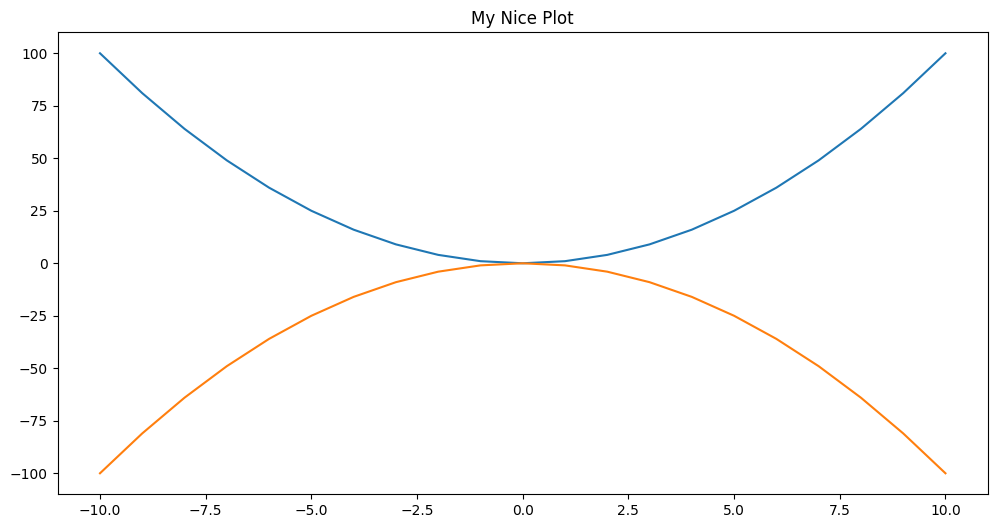

In [ ]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x**2, label='X Squared')
plt.plot(x, -1 * (x**2), label='X Cubed')

##OOP Interface

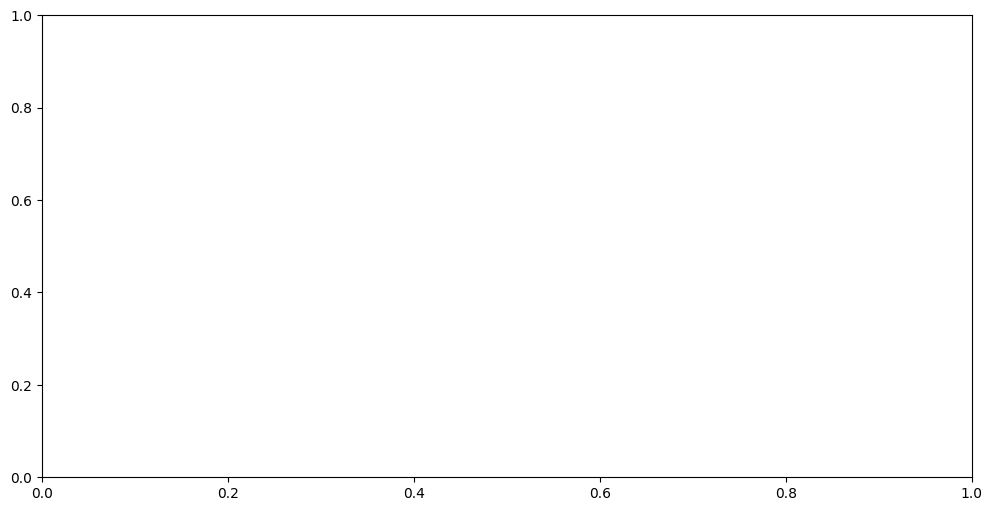

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

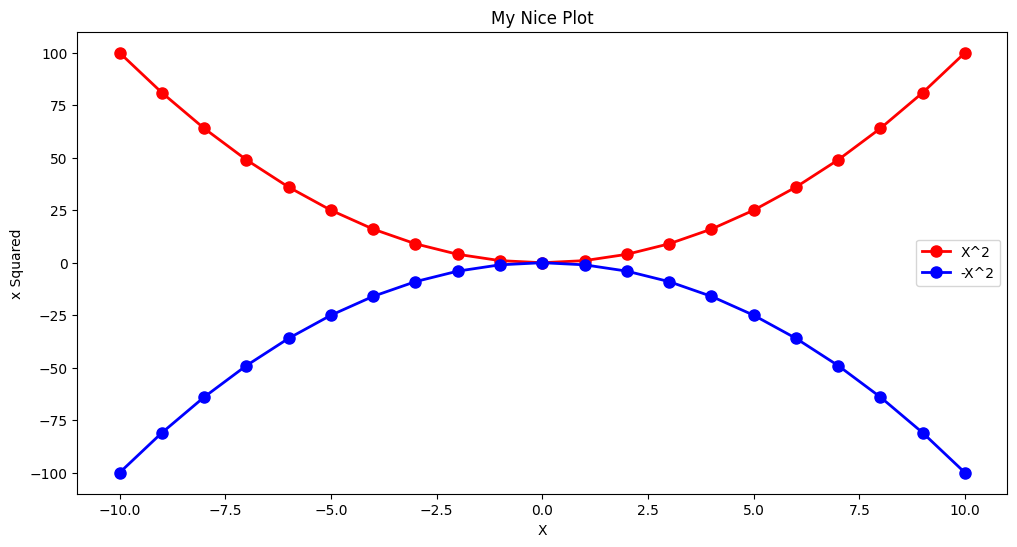

In [ ]:
ax.plot(x, (x**2), color='red', linewidth=2, marker='o', markersize=8, label='X^2')
ax.plot(x, -1 * (x**2), color='blue', linewidth=2, marker='o', markersize=8, label='-X^2')

ax.set_title('My Nice Plot')
ax.set_xlabel('X')
ax.set_ylabel('x Squared')
ax.legend()

fig